In [1]:
import sys
print(sys.executable)

c:\Zolver\zolver-data\venv\Scripts\python.exe


In [5]:
# 2021
import pandas as pd 
import os 
import fitz  # PyMuPDF 라이브러리 / pdf 열기/읽기
from PIL import Image

doc21 = fitz.open("../data/pdfs/final/2021.pdf")
print("total page count: ", doc21.page_count)

page21 = doc21.load_page(5)
print(page21.get_text()) 

total page count:  90
  
  
2021년도 건국대학교 요람
304
교 육 과 정
 교육과정의 구성
본 교육과정은 교양과정･전공과정 및 교직과정으로 구분되어 있다. 이를 다시 세분화하면 교양과정
은 KU인성･기초교양･심화교양･실무소양･KU소양 과목으로, 전공과정은 전공필수･전공선택 과목으로 
구분되어 있다. 이 중에서 교양과정과 전공과정은 모든 학생이 공통적으로 이수하여야 하며, 교직과정
은 해당 과정 이수를 희망하는 학생만 이수하면 된다. 위의 어느 과정에도 속하지 않는 교과목을 이수
할 경우에 그 교과목은 일반선택 과목으로 분류된다. 전공선택B는 타 학과에서 개설된 수업 중 전공선
택으로 인정 가능한 과목을 의미한다.
1. 졸업에 필요한 최저 이수 학점 수
대학
학과
교양
전공
다전공
학생
졸업이수
학점
전필
전선
계
디자인
대학
산업디자인학과
35
14
58
72
40
132
실내디자인학과
35
13
56
69
40
132
패션디자인학과
35
2
70
72
40
132
시각영상디자인학과
35
17
49
66
40
132
미디어콘텐츠학과
35
14
58
72
40
132
조형예술학과
35
2
64
66
40
132
인문
사회
융합
대학
경영학과
35
18
48
66
45
124
경제통상학과
35
12
60
72
40
124
경찰학과
35
12
54
66
40
124
소방방재융합학과
35
12
54
66
40
132
문헌정보학과
35
12
54
66
40
124
유아교육과
35
21
45
66
-
140
사회복지학과
35
12
54
66
40
124
신문방송학과
35
3
63
66
40
124
동화·한국어문화학과
35
12
60
72
40
124
영어문화학과
35
12
54
66
40
124
과학
기술
대학
메카트로닉스공학과
35
21
45
66
40
132
컴퓨터공학과
35
15
51
66
40
132
바이오메디컬공학과
35
21
45
66
40
132
녹색기술융합학과
35
15
57
72
40
132
응용화학과
35
21
45
66
4

In [13]:
# 실제 text는 blocks 안에 있음
info = page21.get_text("dict") # PDF 페이지 전체를 “딕셔너리 형태의 JSON 구조”로 반환
info.keys() # pdf page 전체구조를 list 형태로

dict_keys(['width', 'height', 'blocks'])

In [ ]:
import requests
import json
from dotenv import load_dotenv
import os
import re

load_dotenv()
api_key = os.getenv("GROQ_API_KEY")

prompt = """
당신은 데이터 구조화 전문가입니다.
아래 텍스트를 JSON으로 변환하세요.

단과대학 이름은 공백 없이 합쳐진 형태여야 합니다.
예: "인문사회융합대학", "과학기술대학", "디자인대학"
"인문", "사회", "융합", "대학"처럼 개별 단어로는 절대로 분리하지 마십시오.
"응용 화학 과", "스포츠 건강학 과"처럼 공백을 포함하지 마십시오.


부연 설명은 하지 말고 반드시 유효한 JSON만 출력하세요.
형식 예시는 다음과 같습니다:

{
  "year": "2021",
  "universities": [
    {
      "college": "",
      "departments": [
        {
          "name": "",
          "general_education": 0,
          "major_required": 0,
          "major_elective": 0,
          "major_total": 0,
          "double_major": 0,
          "graduation_total": 0
        }
      ]
    }
  ]
}

이제 아래 텍스트를 위 JSON 구조에 맞게 구조화하십시오:

"""

def text_to_json_with_llm(text):
    content = prompt + text  
    
    res = requests.post(
        "https://api.groq.com/openai/v1/chat/completions",
        headers={
            "Authorization": f"Bearer {api_key}"
        },
        json={
            "model": "llama-3.1-8b-instant",
            "messages": [
                { "role": "user", "content": content }
            ]
        }
    )

    response = res.json()
    json = response["choices"][0]["message"]["content"]

    # 부연 설명 제거 함수 json 
    def extract_json(json):
      final_json = re.search(r'\{[\s\S]*\}', json)
  
      while final_json:
        return final_json
        break

      prompt += "앞 뒤 부연 설명은 하지 말고 반드시 유효한 JSON만 출력하세요."
      return text_to_json_with_llm(text)
    
      
      # 예외처리...


In [9]:
page21 = doc21.load_page(5)
text21 = page21.get_text()

result_json21 = text_to_json_with_llm(text21)
print(result_json21)

```json
{
  "year": "2021",
  "universities": [
    {
      "college": "건국대학교",
      "departments": [
        {
          "name": "디자인대학",
          "departments": [
            {
              "name": "산업디자인학과",
              "general_education": 14,
              "major_required": 21,
              "major_elective": 23,
              "major_total": 58,
              "double_major": 40,
              "graduation_total": 132
            },
            {
              "name": "실내디자인학과",
              "general_education": 13,
              "major_required": 22,
              "major_elective": 21,
              "major_total": 56,
              "double_major": 40,
              "graduation_total": 132
            },
            {
              "name": "패션디자인학과",
              "general_education": 2,
              "major_required": 30,
              "major_elective": 40,
              "major_total": 72,
              "double_major": 40,
              "graduation_total": 132
            },


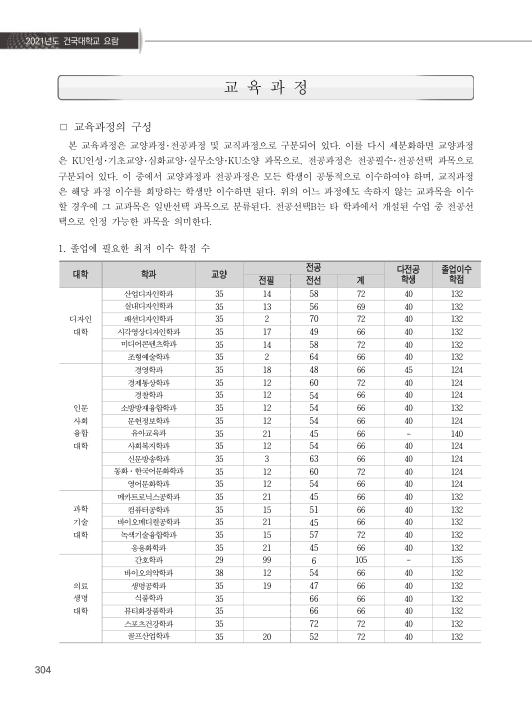

In [39]:
# 이미지로 변환해서 보기
pix = page21.get_pixmap()
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
img